Помимо того, что классы служат фабрикой по производству однотипных объектов со сходным поведением, они имеют ещё одну важную особенность — наследование.

Как мы уже видели, объекты, созданные при помощи класса, наследуют атрибуты класса, которые объявлены прямо в теле, а не добавлены в конкретный независимый экземпляр.

Идея наследования класса состоит в том, что новый класс создаётся не на пустом месте, а на основе уже существующего. В результате наследования все поля и функции из базового класса неявным образом наследуются в производном классе.

При описании производного класса используем шаблон:

In [1]:
class ПроизводныйКласс (БазовыйКласс):

  #Тело класса

IndentationError: ignored

Таким образом, классы умеют наследовать друг у друга, причём не только атрибуты, но и методы.

Это значит, что родительские атрибуты и методы будут доступны у так называемых дочерних (или производных) классов. Убедимся в этом. Чтобы задать родительский класс, надо указать его в скобках при объявлении производного класса, как будто это аргумент функции: 

In [1]:
import datetime


class Product:
    max_quantity = 100000

    def __init__(self, name, category, quantity_in_stock):
        self.name = name
        self.category = category
        self.quantity_in_stock = quantity_in_stock

    def is_available(self):
        return True if self.quantity_in_stock > 0 else False


class Food(Product):
    is_critical = True
    needs_to_be_refreshed = True
    refresh_frequency = datetime.timedelta(days=1)


eggs = Food(name="eggs", category="food", quantity_in_stock=5)
print(eggs.max_quantity)

100000


In [2]:
print(eggs.is_available())

True


Мы видим, что мы создавали объект eggs как экземпляр класса Food, но при этом ему доступны как атрибуты родительского класса (max_quantity), так и его методы (is_available).

Фактически произошло ещё более интересное: для создания экземпляра класса Food мы использовали конструктор его родительского класса Product.

Прежде чем пойти дальше, давайте изучим одну полезную конструкцию: if __name__ == "__main__":.

Эта конструкция позволяет запускать код внутри блока if в зависимости от запущенного файла. В переменной __name__ мы храним путь, откуда запущен файл.

Если мы запустили файл из консоли: python *имя файла*, то в переменной __name__ будет строка "__main__". Если мы импортировали файл из другого файла, в переменной __name__ будет просто название самого файла.

Таким образом, блок кода, который идёт после условия if __name__ == "__main__":, будет выполняться, если мы запустили файл из консоли и не будет, если мы экспортируем этот файл.

Пока не очень понятно? Давайте разберём на примере и создадим два файла: myclass.py и main.py.

В файле myclass.py опишем небольшой класс, а также используем предложенную конструкцию:

In [3]:
class MyClass():  
   def f(self):      
       return 155  
     
if __name__ == "__main__":    
   mc=MyClass()    
   print("It's only for test", mc.f())

It's only for test 155


Теперь немного модернизируем код для наглядности:

In [5]:
class MyClass():  
   def f(self):      
       return 155  
mc2=MyClass()
print("It's for test too", mc2.f())

if __name__ == "__main__":    
   mc=MyClass()    
   print("It's only for test", mc.f())

It's for test too 155
It's only for test 155


Так как мы запускаем файл myclass.py, то оба вывода работают.

А теперь создадим ситуацию, когда один из них работать не будет. В файл main.py добавим следующий фрагмент кода:

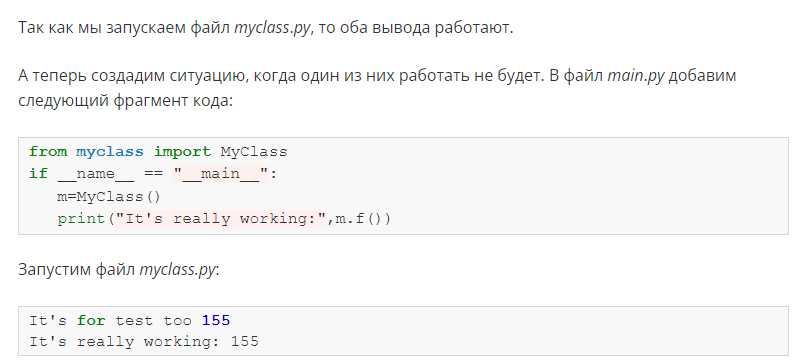

Мы видим, что часть кода, которая не была записана в условие, исполняется при запуске в файле main.py.

Подведём итог: код в конструкции if __name__ == "__main__":  будет выполняться только при запуске файла, в котором он находится. Это очень удобно, когда вы хотите протестировать классы в отдельных файлах или переиспользовать код одного из файлов, не удаляя из него вызовы функций и объявления классов.

Вернёмся к наследованию.

Важно: если мы назовём атрибут или метод так же, как он называется в родительском классе, он будет переопределён. Рассмотрим на примере:

In [6]:
class Event:
    def __init__(self, timestamp=0, event_type="", session_id=""):
        self.timestamp = timestamp
        self.type = event_type
        self.session_id = session_id

    def init_from_dict(self, event_dict):
        self.timestamp = event_dict.get("timestamp")
        self.type = event_dict.get("type")
        self.session_id = event_dict.get("session_id")

    def show_description(self):
        print("This is generic event.")


class ItemViewEvent(Event):
    type = "itemViewEvent"

    def __init__(self, timestamp=0, session_id="", number_of_views=0):
        self.timestamp = timestamp
        self.session_id = session_id
        self.number_of_views = number_of_views

    def show_description(self):
        print("This event means someone has browsed an item.")


if __name__ == "__main__":
    test_view_event = ItemViewEvent(timestamp=1549461608000, session_id="0:NynteeXG:MYlskrqZbcmXNSFEJaZIsNVGeDLLpmct", number_of_views=6)
    test_view_event.show_description()
    print(test_view_event.type)

This event means someone has browsed an item.
itemViewEvent


Что получили?

Переопределили конструктор класса. Теперь мы используем не родительский, а свой, и передаём в него другой набор аргументов. Так у нас получился кастомизированный набор атрибутов: у родительского класса нет атрибута number_of_views.

Переопределили значение атрибута type с помощью атрибута класса. Теперь при вызове type от экземпляра нашего дочернего класса мы получим значение атрибута type нашего класса ItemViewEvent.

Переопределили работу метода show_description: теперь он показывает более специфичное для класса описание. 

Проверка типа объекта
В некотором смысле, определяя новый класс, вы создаёте новый тип данных. Базовые типы данных, предоставляемые Python, также являются классами — иначе откуда у них методы. :-) 

Давайте убедимся в этом с помощью функции isintance. 

Всё просто: вы передаёте в неё объект и тип (класс), а функция возвращает логическое значение результата проверки. То есть говорит вам, является ли объект объектом нужного вам типа (класса). 

In [4]:
print(isinstance("foo", str))

True


In [7]:
print(isinstance(test_view_event, ItemViewEvent))


True


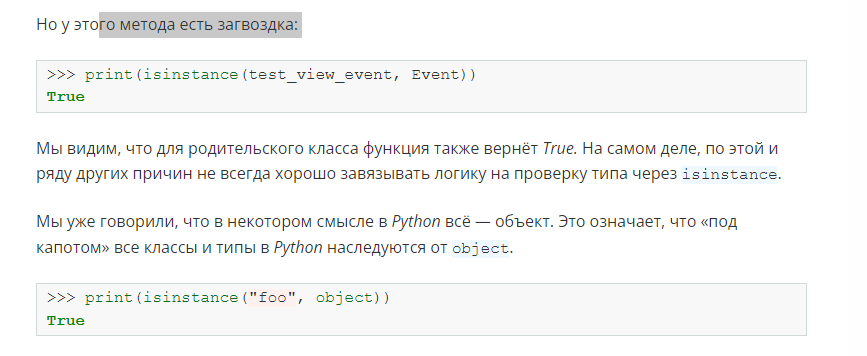

О более сложном наследовании
Классы в Python поддерживают множественное наследование: это значит, что при объявлении класса вы можете через запятую в качестве нескольких аргументов перечислить несколько классов. При этом порядок перечисления важен, так как от этого будет зависеть, в каком порядке Python будет искать одноимённые атрибуты и методы, определяя, какой будет кем переопределён.

Рассмотрим множественное наследование на примере отдельных комнат и квартиры.

Создадим файл flat.py с родительскими классами для двух комнат и кухни:

In [8]:
class Room1:
   def get_room(self):
       print('room1')
 
class Room2:
   def get_room(self):
       print('room2')
 
   def get_room2(self):
       print('room2 for flat')
 
class Kitchen:
   def get_kitchen(self):
       print('kitchen')
 
class Flat(Kitchen,Room1,Room2):
   ...
 
f=Flat()
f.get_kitchen()
f.get_room()
f.get_room2()

kitchen
room1
room2 for flat


Класс Flat наследует классы отдельных комнат в следующем порядке: Kitchen, Room1, Room2. Это значит, что поиск методов при их вызове (f.get_kitchen() и др.) сначала будет осуществляться в классе Kitchen, затем, если s метод не найден, в классе Room1, и только затем Room2. Это хорошо видно на примере вызова метода get_room().

Также заметим, что наследуемый класс Flat также будет определяться как Kitchen, Room1, Room2 в функции isinstance:

In [9]:
print(isinstance(f,Flat))
print(isinstance(f,Room1))
print(isinstance(f,Room2))

True
True
True


В более сложных случаях наследования, например когда несколько родительских классов сами имеют родительский класс, порядок использования методов определяется специальными алгоритмами поиска (вы будете знакомиться с алгоритмами в модуле С4).

Рассмотрим небольшой пример:

In [10]:
class Room:
   def get_room(self):
       print('room')
 
class Room1(Room):
   def get_room(self):
       print('room1')
 
class Room2(Room):
   def get_room(self):
       print('room2')
 
 
 
class Flat(Room1,Room2):
   ...
 
print(Flat.mro()) #  Метод класса, который показывает порядок наследования
 
f=Flat()
f.get_room()

[<class '__main__.Flat'>, <class '__main__.Room1'>, <class '__main__.Room2'>, <class '__main__.Room'>, <class 'object'>]
room1


Обратите внимание на метод mro(), он относится к методам класса, а не объекта класса, поэтому вызывается напрямую от Flat. Метод mro() возвращает порядок, в котором будут проинспектированы родительские классы. Методы класса будут подробно рассмотрены в следующем модуле.

На практике сложные системы наследования используются не так уж часто. Как правило, берутся сторонние готовые библиотеки и модули и выполняется наследование от нужных классов, чтобы дополнить и переопределить их логику.

Классы также можно передавать в другие файлы с помощью импорта. Рассмотрим импорт на примере класса «Прямоугольник».

Создадим конструктор, который будет описывать прямоугольник с имеющимися характеристиками: ширина и высота.

Вычислим площадь фигуры (area):

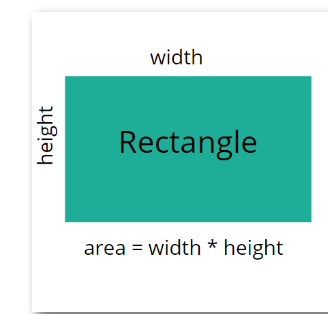

ВАЖНО: работать будем с несколькими файлами, размещёнными в папке practice_C1. Не забывайте сохранять файлы с помощью Ctrl+S!


In [11]:
class Rectangle:
    def __init__(self, width, heigth):
        self.width = width
        self.height = heigth

    def get_width(self):
        return self.width

    def get_height(self):
        return self.height

    # Метод, рассчитывающий площадь
    def get_area(self):
        return self.width * self.height

Выполним импорт из основного файла класса, где описан прямоугольник (Rectangle), возьмём оттуда все свойства, такие как width (ширина) и height (высота), и создадим псевдопрямоугольник r1. 

Прямоугольник r1 должен получить те же характеристики, что и базовый прямоугольник (Rectangle).  Проиллюстрируем сказанное схемой:

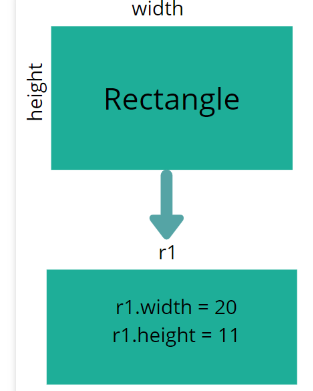

Создадим ещё отдельный файл под названием testRectangle.py для того, чтобы реализовать наследование. Причём обязательно в той папке, где находится rectangle.py (в нашем случае это папка practice_C1). 

In [12]:
#from rectangle import Rectangle

r1 = Rectangle(10, 5)

print("r1.width =", r1.width)
print("r1.height =", r1.height)
print("r1.get_width =", r1.get_width())
print("r1.get_height =", r1.get_height())
print("r1.get_area =", r1.get_area())

r1.width = 10
r1.height = 5
r1.get_width = 10
r1.get_height = 5
r1.get_area = 50


Теперь попробуйте самостоятельно вывести второй унаследованный прямоугольник, назвав его, например, r2. 

Каков механизм работы? Когда вы создаёте объект класса Rectangle, конструктор этого класса будет вызван для создания объекта, а атрибутами объекта будут присвоены значения из параметра. 

Проиллюстрируем сказанное схемой:

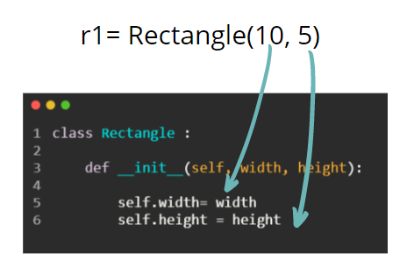

Создайте класс Cat в отдельном файле. Класс должен содержать конструктор с параметрами: имя, пол, возраст и методы get(), которые будут возвращать все параметры объекта.

В другом файле создайте экземпляры класса. В качестве входных данных используйте данные о котах с сайта «Дом питомца». Не забудьте импортировать класс Cat в файл.

Далее сделайте вывод информации о котах в консоль.

In [13]:
class Cat:
  def __init__(self, name, gender, age):
      self.name = name
      self.gender = gender
      self.age = age


  def get_name(self):
      return self.name

  def get_gender(self):
      return self.gender

  def get_age(self):
      return self.age


cat_1 = Cat("Baron", "boy", 2)
cat_2 = Cat("Sam", "boy", 2)

print(cat_1.get_name(), cat_1.get_gender(), cat_1.get_age())
print(cat_2.get_name(), cat_2.get_gender(), cat_2.get_age())

Baron boy 2
Sam boy 2


Создайте класс Dog с помощью наследования класса Cat. Создайте метод get_pet() таким образом, чтобы он возвращал только имя и возраст.

Далее сделайте вывод этой информации в консоль.

In [17]:
class Dog(Cat):
    def get_pet(self):
        return f'{self.get_name()} {self.get_age()}'

dog_1=Dog("Felix","boy",2)

print(dog_1.get_pet())

Felix 2


https://www.geeksforgeeks.org/inheritance-in-python/

https://www.digitalocean.com/community/tutorials/understanding-class-inheritance-in-python-3